In [3]:
import pandas as pd

df = pd.read_csv(r'D:\pythone data cleaning project\netflix_titles(1).csv')  # or your path
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [27]:
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [13]:
df['date_added'] = df['date_added'].str.strip()

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [17]:
df['date_added'] = df.apply(
    lambda row: pd.Timestamp(f"{row['release_year']}-06-01") if pd.isna(row['date_added']) else row['date_added'],
    axis=1
)

In [19]:
df.to_csv('cleaned_netflix_titles.csv', index=False)

In [21]:
df_exported = pd.read_csv('cleaned_netflix_titles.csv')
print(df_exported.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   date_added  release_year rating   duration  \
0  2021-09-25          2020  PG-13     90 min   
1  2021-09-24          2021  TV-MA  2 Seasons   
2  2021-09-24          2021  TV-MA   1 Season   
3  2

In [23]:
from IPython.display import FileLink

# Save to current directory
df.to_csv('cleaned_netflix_titles.csv', index=False)

# Provide a clickable download link
FileLink('cleaned_netflix_titles.csv')

C:\Users\SHUBHAM\cleaned_netflix_titles.csv

In [31]:
df['duration'] = df['duration'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [33]:
df['title'] = df['title'].str.strip()
df['type'] = df['type'].str.title()  # Movie, Tv Show

In [35]:
df['rating'] = df['rating'].replace('Unknown', 'Not Rated')

In [37]:
print(df['rating'].value_counts())

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64


In [39]:
# Check rows where 'rating' is a duration instead of an actual rating
df[df['rating'].str.contains('min', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,Unknown,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,Unknown,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,Unknown,Movies,The comic puts his trademark hilarious/thought...


In [41]:
# Move misplaced duration from 'rating' to 'duration' if 'rating' contains 'min'
mask = df['rating'].str.contains('min', na=False)

# Set those duration values
df.loc[mask, 'duration'] = df.loc[mask, 'rating']

# Now fix the 'rating' back to 'Not Rated'
df.loc[mask, 'rating'] = 'Not Rated'

In [43]:
print(df[df['rating'].str.contains('min', na=False)])
print(df['rating'].value_counts())
print(df['duration'].value_counts())

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
Not Rated       7
TV-Y7-FV        6
NC-17           3
UR              3
Name: count, dtype: int64
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64


In [45]:
df.duplicated().sum()  # total duplicates
df.drop_duplicates(inplace=True)

<Axes: >

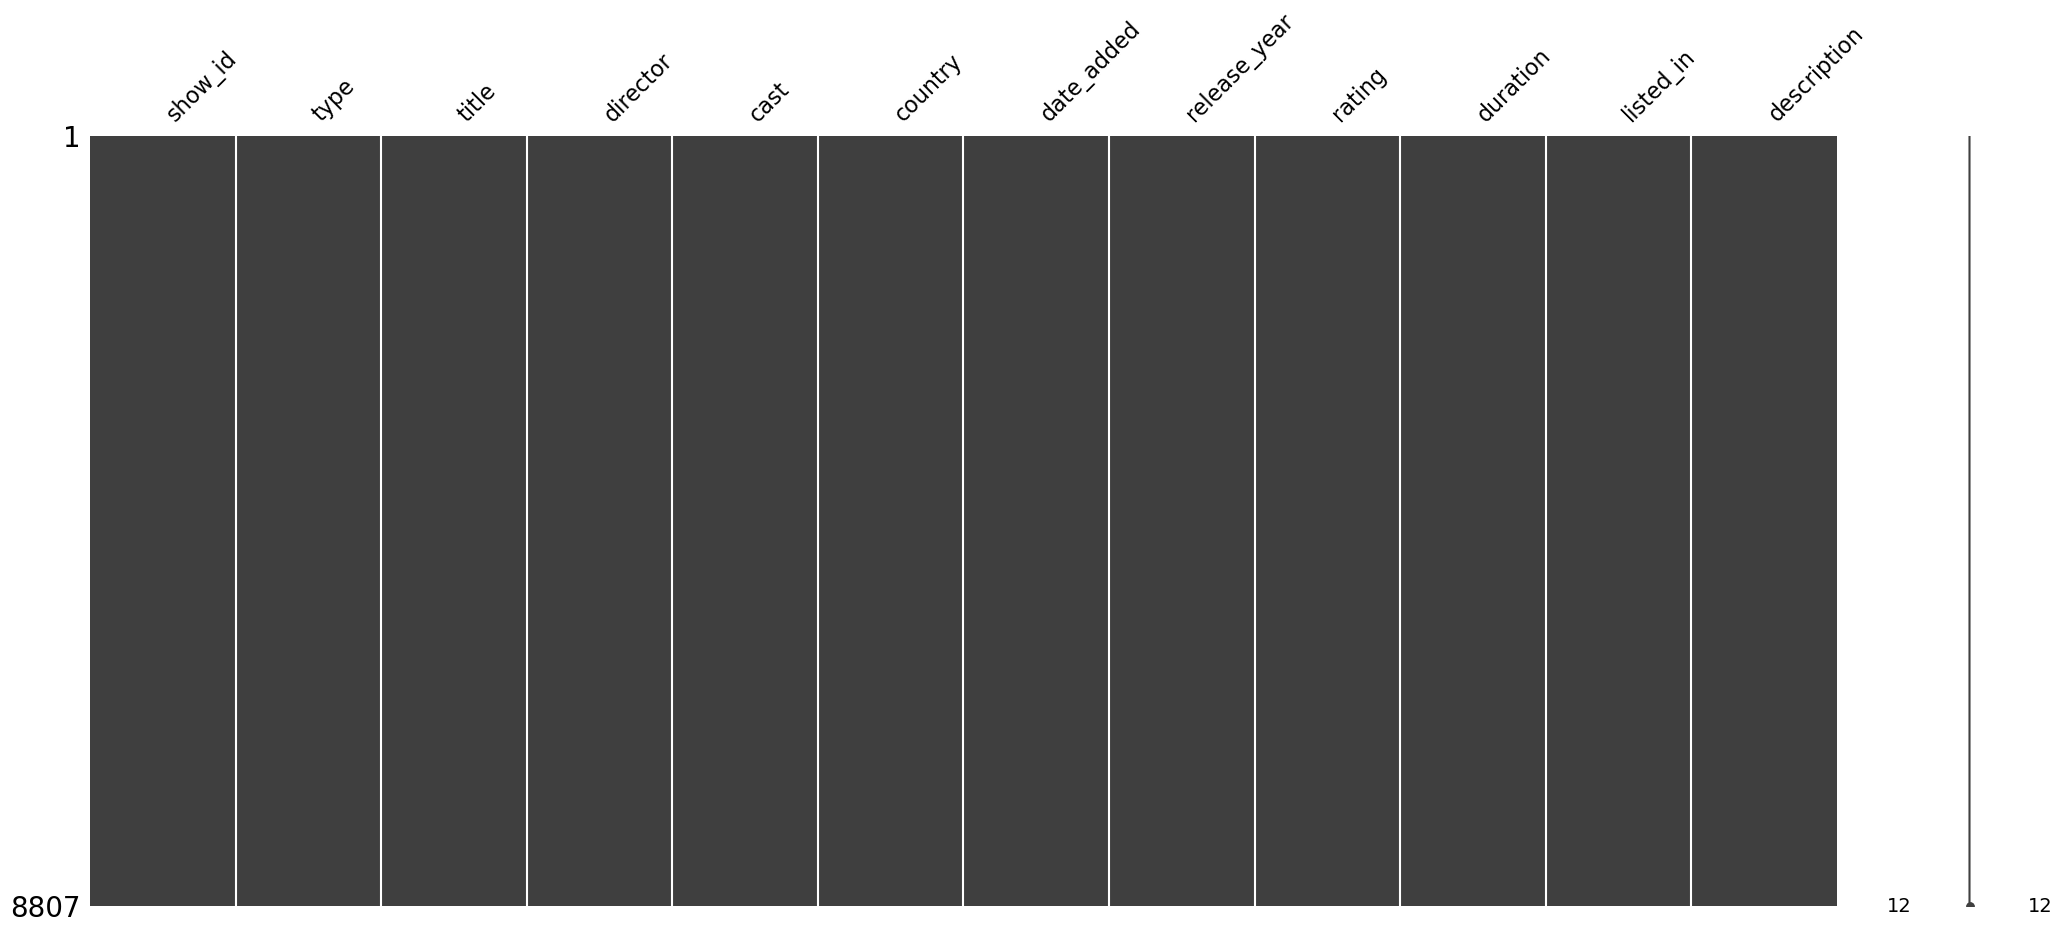

In [49]:
import missingno as msno
msno.matrix(df)

In [51]:
from IPython.display import FileLink

# Save to current directory
df.to_csv('cleaned_netflix_titles.csv', index=False)

# Provide a clickable download link
FileLink('cleaned_netflix_titles.csv')

C:\Users\SHUBHAM\cleaned_netflix_titles.csv